In [39]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeClassifier, plot_tree  # or DecisionTreeRegressor
# from sklearn.metrics import confusion_matrix, classification_report  # or relevant metrics for regression
# from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pydotplus
from IPython.display import Image


In [22]:
# Load the dataset (Addding the actual file path)
data = pd.read_csv('apple_quality 2.csv')


In [23]:

# Explore the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         999 non-null    int64  
 1   Size         999 non-null    float64
 2   Weight       999 non-null    float64
 3   Sweetness    999 non-null    float64
 4   Crunchiness  999 non-null    float64
 5   Juiciness    999 non-null    float64
 6   Ripeness     999 non-null    float64
 7   Acidity      999 non-null    float64
 8   Quality      999 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 70.4+ KB
None
             A_id        Size      Weight   Sweetness  Crunchiness  \
count  999.000000  999.000000  999.000000  999.000000   999.000000   
mean   499.000000   -0.428353   -0.926774   -0.473591     1.006607   
std    288.530761    1.926037    1.574031    1.903221     1.455319   
min      0.000000   -6.129668   -6.556685   -5.958315    -4.087563   
25%    249.50000

In [24]:
print("Column Names:", data.columns)

Column Names: Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')


In [25]:
le = LabelEncoder()
data['Quality'] = le.fit_transform(data['Quality'])

In [26]:
  # Set up features and target variable
X = data.drop('Quality', axis=1)  # Features
y = data['Quality']  # Target variable

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Create a Decision Tree model
model = DecisionTreeClassifier()  # or DecisionTreeRegressor

In [34]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Make predictions
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)  # or relevant evaluation metric for regression
class_report = classification_report(y_test, y_pred)  # or relevant evaluation metric for regression

In [33]:
# Print evaluation results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[84 15]
 [24 77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        99
           1       0.84      0.76      0.80       101

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [40]:
feature_names = X.columns
dot_data = export_graphviz(model, out_file=None, feature_names=feature_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')

True

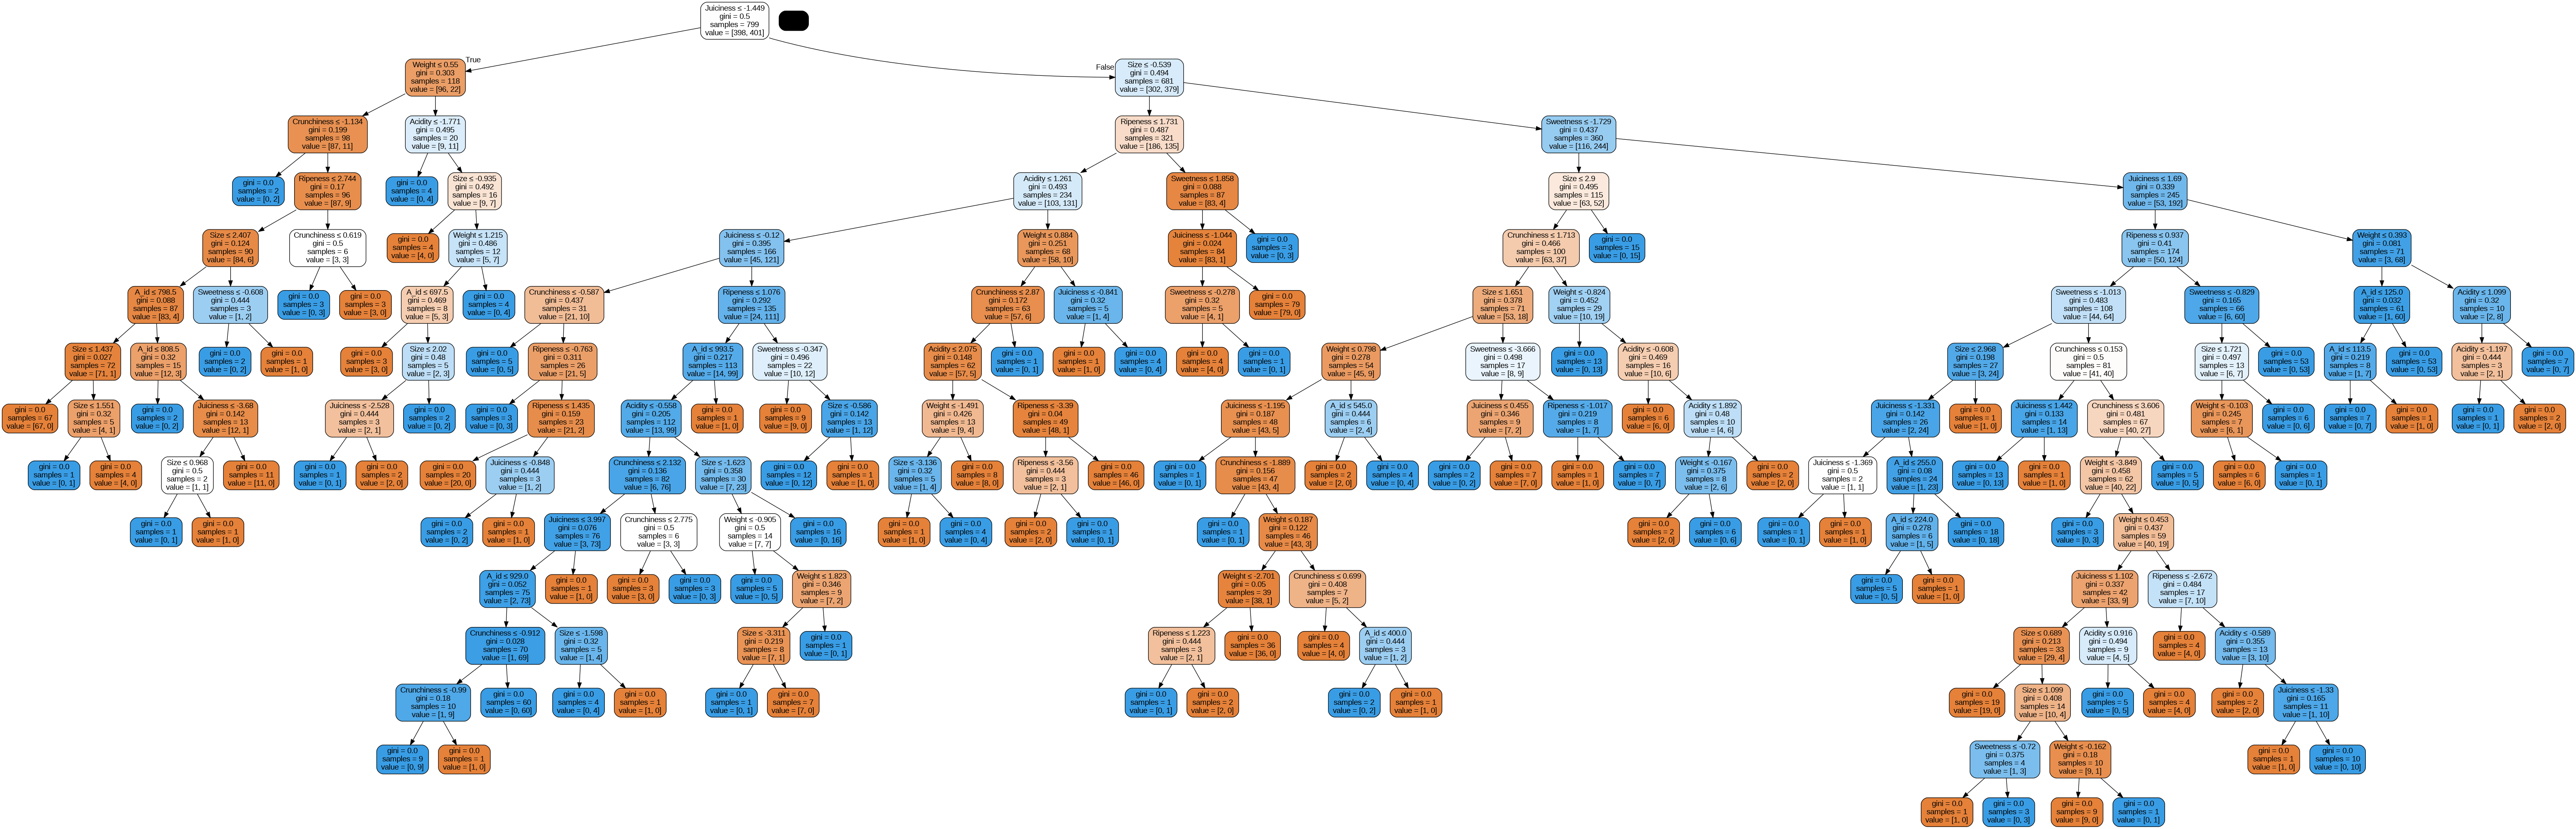

In [41]:
# Display the Decision Tree image
Image(graph.create_png())